# Program 1: Task 2: Understanding Customer Demographics




### Questions to answer:

  Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
  

 Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?



## Import libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from IPython.display import Image 
from sklearn.externals.six import StringIO 
import pydotplus

import graphviz
from graphviz import Source


%matplotlib inline

In [98]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [99]:
# Read data into Pandas dataframe

demo_data = pd.read_csv("Demographic_Data.csv")
demo_data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
5,0,24,3,1314.20,4
6,0,43,6,8.55,2
7,1,66,5,819.98,3
8,1,51,5,908.31,1
9,1,47,3,767.54,1


# <span style='background :yellow' > Modeling: </span>

   We are done with Data Preprocessing and Exploratory data analysis. Let's move on to Modeling. We want to investigate the relationship between Region of Purchase and Customer's age.
   
  

##### Steps:
    
   
   1. Choose Training and test data
   2. Feature Selection - Select only relevant features to train the model
   3. Choose 2 or more appropriate machine learning algorithm for the problem 
   3. Model Selection- Select the one with high cross_val_score
   4. Train the Selected model
   5. Evaluate the Selected model using test data
   6. Assess the performance using various metrics
   7. Tune the hyper parameters of the model to improve performance
  

# <span style='background :yellow' >1. Choose train and test data

 In statistics and machine learning, we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test). We fit our model on the training data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. 

### Overfitting:

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized).The model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

### Underfitting:

Underfitting means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data.  Underfitting is not as prevalent as overfitting.
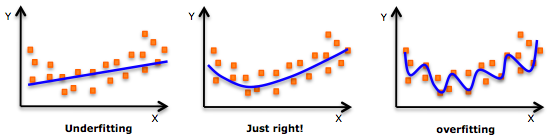


The data is split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. The test dataset (or subset) is used to test our model’s predictions.


### Train/test split and cross validation helps to avoid overfitting 

### Features: in-store, age, items, amount 
### Dependent Variable: region

Let's divide the dataframe into X and y. X will contain data of all the features and y will contain data of the dependent Variable

In [100]:
X = demo_data[['in-store', 'age', 'items','amount']]
y = demo_data['region']


In [101]:
# We use the Sci -kit learn's train-test-split to divide the entire data into training and test data
# We import train_test_split from sklearn.model_selection
# Since the test size is 0.3, 70% of the data is used for training and remaining 30% will be used as test data
# The predicted values from the model will be checked against test data for accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=123,stratify=y)

# Let's check the distribution of training data
y_train.value_counts()

4    18200
2    14000
3    12600
1    11200
Name: region, dtype: int64

train_test_split has some parameters such as train size, test size, random_state, shuffle and stratify. 

Shuffle = default is True. It specifies whether or not to shuffle the data before splitting.

random_state= default is None.  If we don’t specify a number or RandomState object instance, each iteration of the train_test_split will give you different groups, since the seed used to proceed with the randomness around the split would be different. This may lead to confusion if for any reason we have to run our code, and we start obtaining different results.

stratify = default is None. Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

#### <span style='color:red'>Alternatively, we can specify stratify=y in train_test_split and see whether this has any impact on the accuracy of the model

# <span style='background :yellow' > 2. Feature Selection </span>

    
   Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.
   Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
     
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.
Benefits of performing feature selection before modeling your data:
        
    . Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    · Improves Accuracy: Less misleading data means modeling accuracy improves.
    · Reduces Training Time: Fewer data points reduce algorithm complexity and algorithms train faster.

Top reasons to use feature selection are:

    It enables the machine learning algorithm to train faster.
    It reduces the complexity of a model and makes it easier to interpret.
    It improves the accuracy of a model if the right subset is chosen.
    It reduces overfitting.

Feature selection is different from dimensionality reduction. Both methods seek to reduce the number of attributes in the dataset, but a dimensionality reduction method do so by creating new combinations of attributes, where as feature selection methods include and exclude attributes present in the data without changing them.


### The selection of features is independent of any machine learning algorithms

### Feature Selection Algorithms
There are three general classes of feature selection algorithms:
### Filter methods, Wrapper methods and Embedded methods.

### Filter Method for Feature selection
The filter method ranks each feature based on some uni-variate metric and then selects the highest-ranking features. Some of the uni-variate metrics are

    variance: removing constant and quasi constant features
    chi-square: used for classification. It is a statistical test of independence to determine the dependency of two variables.
    correlation coefficients: removes duplicate features
    Information gain or mutual information: assess the dependency of the independent variable in predicting the target variable. In other words, it determines the ability of the independent feature to predict the target variable

##### Advantages of Filter methods
    Filter methods are model agnostic
    Rely entirely on features in the data set
    Computationally very fast
    Based on different statistical methods
###### The disadvantage of Filter methods
The filter method looks at individual features for identifying it’s relative importance. A feature may not be useful on its own but maybe an important influencer when combined with other features. Filter methods may miss such features.
##### Filter criteria for selecting the best feature
Select independent features with

    High correlation with the target variable
    Low correlation with another independent variable
    Higher information gain or mutual information of the independent variable
    
### Wrapper Methods
Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model us used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

An example if a wrapper method is the recursive feature elimination algorithm.

### Embedded Methods
Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://towardsdatascience.com/feature-selection-identifying-the-best-input-features-2ba9c95b5cab

### Let's use filter feature selection methods to select relevant features for our classification problem

##### Choosing the statistical function for filter feature selection method:

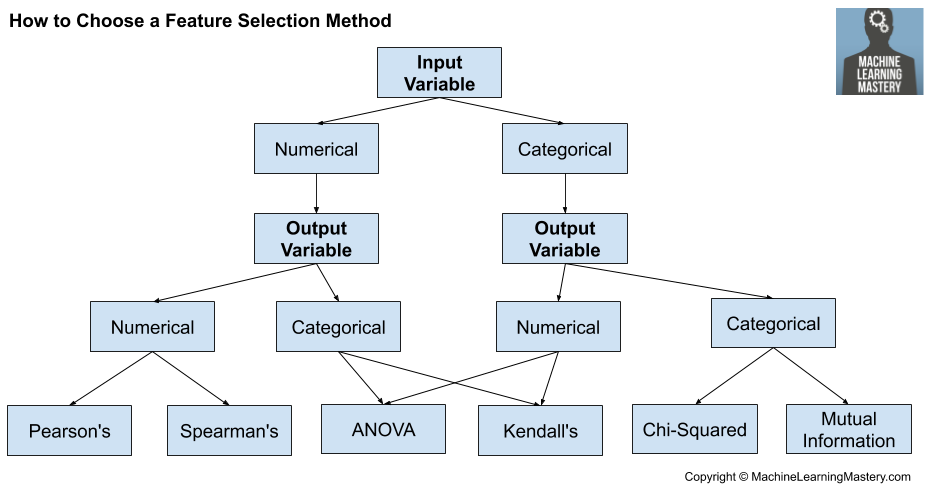

### Using Sci-Kit learn for Filter Feature Selection:

The scikit-learn library provides an implementation of most of the useful statistical measures.

For example:

    Pearson’s Correlation Coefficient: f_regression()
    ANOVA: f_classif()
    Chi-Squared: chi2()
    Mutual Information: mutual_info_classif() and mutual_info_regression()

#### Selection Method
The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

Two of the more popular methods include:

       Select the top k variables: SelectKBest
       Select the top percentile variables: SelectPercentile
    
    SelectKBest class can be used with a suite of different statistical tests. It will rank the features with the statistical test that we've specified and select the top k performing ones (meaning that these terms is considered to be more relevant to the task at hand than the others), where k is also a number that we can tweak.

####  Tree based models calculates feature importance for they need to keep the best performing features as close to the root of the tree.

In [102]:
# Display numbers in floating point

pd.options.display.float_format = '{:.2f}'.format

## Let's select the relevant features for our Demographic data using Various methods


### <span style='color:green'> Method 1: Select features using Univariate filter Selection SelectKBest- Chi square test

In [103]:

# Perform Chi square to test the relationship between each input and target variable

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train,y_train)

# Assigning scores and columns to a dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  



  Attributes       Score
3     amount 10324437.20
1        age    57047.09
0   in-store    12926.78
2      items        2.64


#### Observation: 'Items' attribute has the least score. It is not related to target variable

### <span style='color:green'> Method 2: Select features using Univariate filter Selection SelectKBest- Mutual information gain

In [104]:
#Perform Mutual information gain to test the relationship between each input and target variable

bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)

# Assigning scores and columns to a dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  


  Attributes  Score
3     amount   0.33
0   in-store   0.32
1        age   0.16
2      items   0.01


#### Observation: 'Items' attribute has the least score. It is not related to target variable

### <span style='color:green'>Method 3: Select Features With Best ANOVA F-Values

In [105]:
# Perform Anova test to check the relationship between each feature and the target variable and rank them according to score
# SelectKBest selects k best features according to score

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)

# Assigning scores and columns to a dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  


  Attributes    Score
0   in-store 15979.82
3     amount  7860.85
1        age  4340.36
2      items     0.93


#### Observation: 'Items' attribute has the least score. It is not related to target variable

### <span style='color:green'> Method 4: Feature importance using ExtraTreesClassifier


SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter.
Compared to univariate feature selection, model-based feature selection consider all feature at once, thus can capture interactions. The model used for the feature selection doesn’t need to be the same model for the training later.

#### Using ExtraTreesClassifier to Calculate feature importance


In [106]:

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  
 

array([0.15688199, 0.17682176, 0.04353265, 0.62276359])

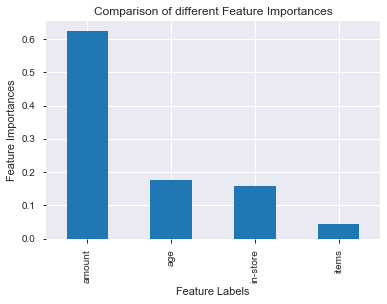

In [107]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar')

# Labels for the plot
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

### <span style='color:blue'>OBSERVATION:
We performed Univariate feature selection with Chi squared test, ANOVA, Mutual information gain and Feature importance with ExtratreesClassifier. In all the four methods, the attribute 'Item' has the least score.

#### <span style='color:blue'>From the above results, we can infer 'Items' feature has least importance.  </span>
#### We can drop this irrelevant feature from the model

In [108]:
X_train.drop('items',axis=1).head(5)
X_test.drop ('items',axis=1).head(5)

,in-store,age,amount
77472,0,51,329.28
22247,0,79,421.80
39461,1,21,247.18
60404,1,31,1019.50
68248,1,32,88.14


# <span style='background :yellow' >3. Choose Machine learning algorithm for Classification</span>


   Traditionally, software engineering combined human created rules with data to create answers to a problem. Instead, machine learning uses data and answers to discover the rules behind a problem. (Chollet, 2017)
   
   Machine learning is a way of identifying patterns in data and using them to automatically make predictions or decisions.
   
   The two main methods of machine learning are Classification and Regression. The difference between classification and regression is that regression outputs a number rather than a class. 
   
   There are multiple forms of Machine Learning; supervised, unsupervised , semi-supervised and reinforcement learning.
   
   ### Supervised Machine learning: 
   Supervised machine learning algorithms are designed to learn by example. The name “supervised” learning originates from the idea that training this type of algorithm is like having a teacher supervise the whole process.
When training a supervised learning algorithm, the training data will consist of inputs paired with the correct outputs. During training, the algorithm will search for patterns in the data that correlate with the desired outputs. After training, a supervised learning algorithm will take in new unseen inputs and will determine which label the new inputs will be classified as based on prior training data. The objective of a supervised learning model is to predict the correct label for newly presented input data.

   We have different types of classification algorithms in Machine Learning. Some of them are
   
            1.Linear Classifiers: Logistic Regression, Naive Bayes Classifier.
            2.K Nearest Neighbor.
            3.Support Vector Machines.
            4.Decision Trees.
            5.Boosted Trees.
            6.Random Forest.
            7.Neural Networks.
   
  

###   Ours is a Classification problem. Let's use Supervised machine algorithm to solve this

We want to predict Region attribute (It's a discrete Variable and contains only 4 Values). 
        
 <span style='color:blue'>  Let us Choose
        
  <span style='color:blue'> 1. Decision Tree Classifer Algorithm
      
  <span style='color:blue'> 2. Random Forest Classifier Algorithm
      
  <span style='color:blue'> 3. K Nearest neighbor     
  
    
        

# <span style='background :yellow' > 4. Model Selection using Cross Validation</span>

### Hold-out
Hold-out is when you split up your dataset into a ‘train’ and ‘test’ set. The training set is what the model is trained on, and the test set is used to see how well that model performs on unseen data. A common split when using the hold-out method is using 80% of data for training and the remaining 20% of the data for testing.

There is a problem of Overfitting / Underfitting.

### How to tackle Problem of Overfitting:

### The answer is Cross Validation
A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.
To address this, we can split our initial dataset into separate training and test subsets.
There are different types of Cross Validation Techniques but the overall concept remains the same.

    • To partition the data into a number of subsets
    • Hold out a set at a time and train the model on remaining set
    • Test model on hold out set

Repeat the process for each subset of the dataset



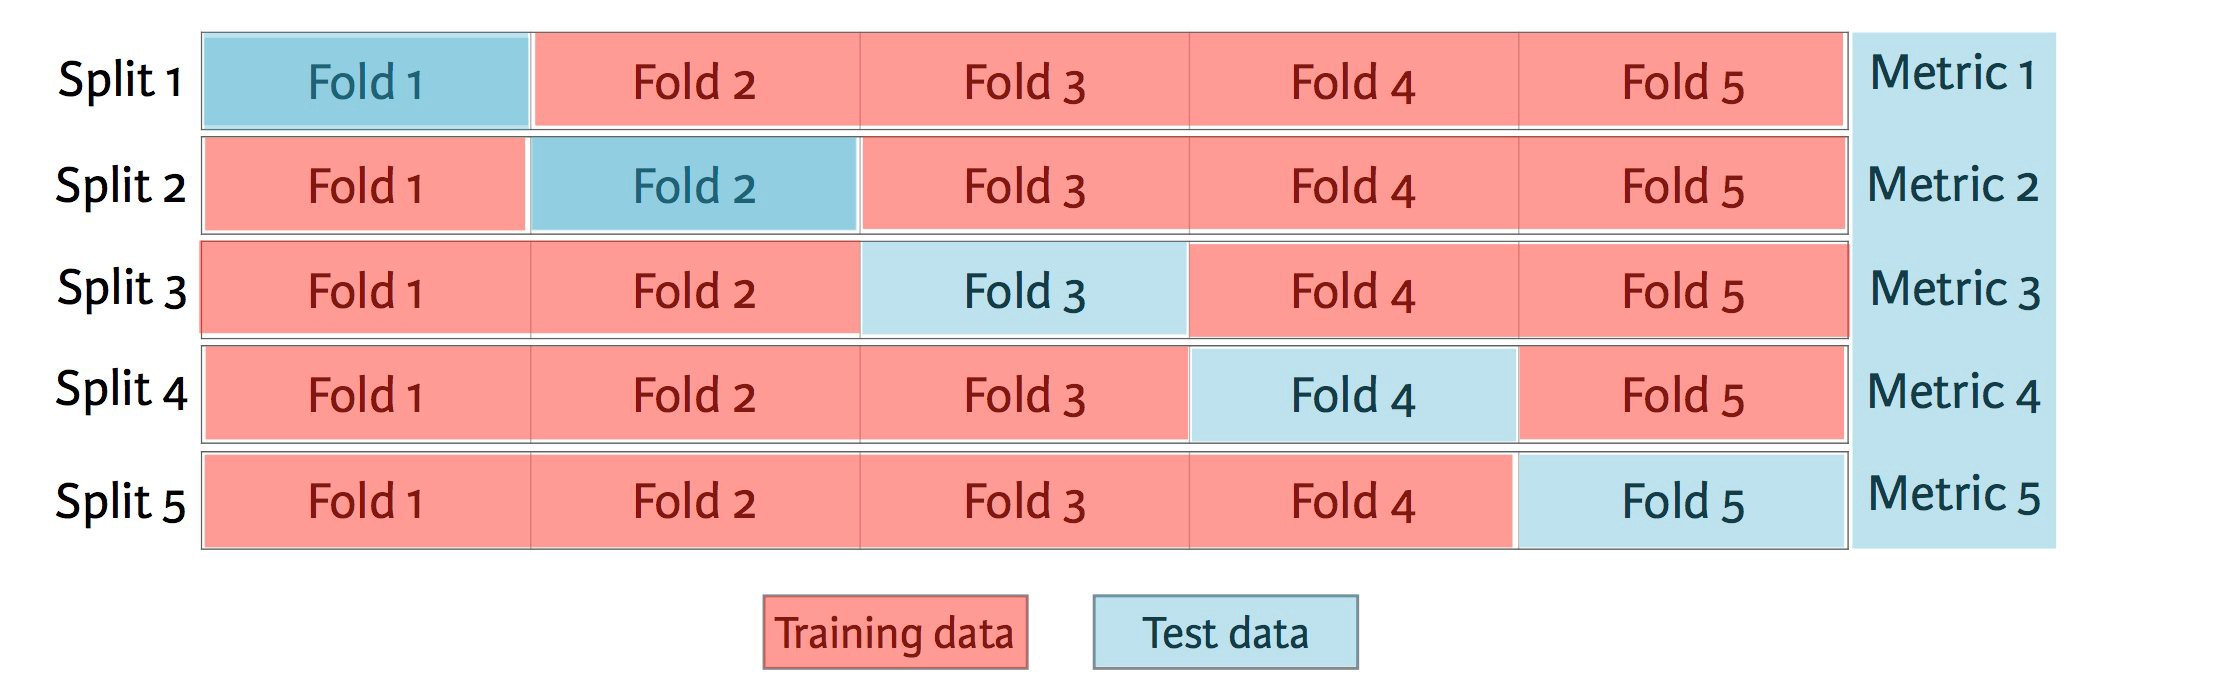
    
    
There are various types of Cross Validation

    •K-Fold Cross Validation
    •Stratified K-fold Cross Validation
    •Leave One Out Cross Validation

### Let us train Random Forest with k fold cross validation and use accuracy as scoring metric

In [109]:
# let's train Random forest algorithm on training data
# Let's use 3 fold Cross Validation

model = RandomForestClassifier()
result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
result.mean()

0.5850874620573656

### Let us compare all the three chosen algorithms at the same time

 It is often necessary to build more than one model in order to find the most appropriate one for the job. Sci-Kit Learn has a function that will 'score' each model for appropriateness based on the algorithm that was used to build it; models with the highest scores should be used to make predictions. The metric we will use to check for proper model usage is called the cross_val_score.

In [110]:
# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.5855249612762424
Decision Tree Classifier 0.5615999697063713
K nearest neighbors Classifier 0.504500037501875


###  <span style='color:blue'>OBSERVATION:
    
    Let us Choose Random Forest (58.4%) and Decision Tree Classifiers(56.2%) for training as their accuracy are better than KNN Classifier. 
    

# <span style='background :yellow' >5. Train the Selected model</span>

### Let us fit Decision Tree model with training data

In [111]:

dt= DecisionTreeClassifier().fit(X_train,y_train)

### Let us fit Random Forest model with training data

In [112]:
rf=RandomForestClassifier().fit(X_train,y_train)


# <span style='background :yellow'>6. Predict the test data using Selected models</span>

In [113]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)


# <span style='background :yellow'>7. Assess the performance of the model using metrics</span>

#### Metrics
   
   Since this is a classification problem we will specify three different performance metrics to assess the performance of the model and the accuracy of its predictions. The three metrics are (more information about each can be found in the resources):

    Accuracy    - Proportion of true results among the total number of cases examined.
    Weighted Mean Recall - what proportion of predicted Positives is truly Positive?
    Weighted Mean Precision - what of actual Positives is correctly classified

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

#### Assess the performance of Decision tree

In [114]:
print(classification_report(y_test, dt_pred))
print("Accuracy:",accuracy_score(y_test, dt_pred))


              precision    recall  f1-score   support

           1       0.40      0.39      0.40      4800
           2       0.91      0.90      0.90      6000
           3       0.37      0.36      0.37      5400
           4       0.53      0.54      0.54      7800

    accuracy                           0.56     24000
   macro avg       0.55      0.55      0.55     24000
weighted avg       0.56      0.56      0.56     24000

Accuracy: 0.5621666666666667


Confusion matrix:
 [[1893    0 1428 1479]
 [   0 5394  227  379]
 [1405  188 1964 1843]
 [1476  368 1715 4241]]


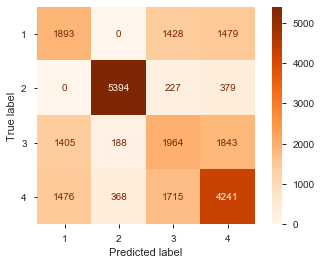

In [115]:
# Confusion matrix

print("Confusion matrix:\n" ,confusion_matrix(y_test, dt_pred))
disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=[1,2,3,4],
                                 cmap=plt.cm.Oranges,
                                 normalize=None,
                                values_format='d')
plt.grid(False)  


#### Assess the performance of Random Forest

In [116]:
print(classification_report(y_test, rf_pred))
print("Accuracy for Random Forest:",accuracy_score(y_test, rf_pred))


              precision    recall  f1-score   support

           1       0.40      0.40      0.40      4800
           2       0.90      0.96      0.93      6000
           3       0.39      0.35      0.37      5400
           4       0.56      0.58      0.57      7800

    accuracy                           0.59     24000
   macro avg       0.56      0.57      0.57     24000
weighted avg       0.58      0.59      0.58     24000

Accuracy for Random Forest: 0.5865


Confusion matrix:
 [[1898    0 1390 1512]
 [   0 5766   86  148]
 [1464  221 1892 1823]
 [1390  421 1469 4520]]


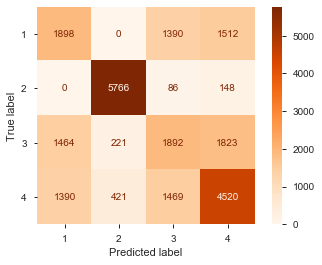

In [117]:
print("Confusion matrix:\n" ,confusion_matrix(y_test, rf_pred))
disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=[1,2,3,4],
                                 cmap=plt.cm.Oranges,
                                 normalize=None,
                                values_format='d')
plt.grid(False)  


### <span style='color:blue'> OBSERVATION:
    
   ####  Random Forest Algorithm's accuracy (58.79%) is better than Decision tree (56.4%) in prediction of test data.
    
    58% is still not the desired accuracy. The above algorithms are trained with default hyperparameters.
   
     
### <span style='color:blue'> Let us tune the hyperparameters of each algorithm to improve the accuracy.

# <span style='background :yellow' >8. Tune the hyperparameters of the model</span>

Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

 A hyperparameter is a parameter of the model that is set prior to the start of the learning process. Different models have different hyperparameters that can be set
    
   The process of finding most optimal hyperparameters in machine learning is called hyperparameter optimisation.

Common algorithms include:
    
    1. Grid Search    
    2. Random Search    
    3. Bayesian Optimisation

### <span style='color:green'>Algorithm 1: Decision Tree</span>
    
       
    Hyperparameters for a decision tree algorithm:
        1. criterion: string, optional (default=”gini”) . Other option is Entropy
        2. max_depth: int or None, optional (default=None)
        3. min_samples_split: int, float, optional (default=2)
        4. min_samples_leaf: int, float, optional (default=1)
        5. min_weight_fraction_leaf: float, optional (default=0.)
        6. max_features: int, float, string or None, optional (default=None)
        7. random_state: int, RandomState instance or None, optional (default=None)
        8. min_impurity_decrease: float, optional (default=0.)
        9. class_weight: dict, list of dicts, “balanced” or None, default=None
        10. presort: bool, optional (default=False)
        

https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

### <span style='color:blue'>Let us tune the hyperparameters of Decision Tree Using Grid Search 

In [118]:

# Assign the Classifier
classifier= DecisionTreeClassifier()

   
# Set up a dictionary of parameters that we want to tune
grid_param = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2,3,4,5],
        'min_samples_split': [2, 5, 10, 15, 100],
        'min_samples_leaf': [1, 2, 5, 10], 
        'splitter': ['best','random']
        }


# Perform Grid search with the parameters
clf = GridSearchCV(estimator=classifier,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)

# Fit the grid search
clf.fit(X_train, y_train)

# View The Best Parameters
print('Best Criterion:', clf.best_params_)


# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X,y, cv=3, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


Best Criterion: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

[0.64397945 0.64420445 0.64621616]

0.6448000177017214

0.0010055646596869765


### <span style='color:blue'>Accuracy has improved to 64.48% after tuning the hyperparameters On Cross Validated training data

### <span style='color:green'>Algorithm 2: Random forest

Few Hyper parameters for Random Forest Classifier:

    1. n_estimators
    2. max_depth
    3. min_samples_split
    4. min_samples_leaf



### <span style='color:blue'>Let us tune the hyperparameters of Random Forest Using Randomized Search # 

In [119]:
# Setting the parameters

n_estimators = [100, 300]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

# Assigning the classifier
forest = RandomForestClassifier()

# Assigning parameters
params = dict(n_estimators = n_estimators,
              max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)



In [120]:
# Let us use RandomizedSearchCV for selecting hyperparameters
# GridSearchCV is time consuming than RandomizedSearchCV

clf = RandomizedSearchCV(forest, params, cv = 3, verbose = 1, 
                      n_jobs = -1)

# Fit the grid search
clf.fit(X_train, y_train)

print(clf.best_estimator_.get_params())


# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

[0.64382945 0.64461694 0.64621616]

0.644887516607985

0.0009929739755147413


### <span style='color:blue'>Accuracy has improved to 64.49% on Cross Validated data
    

##  Ensemble learning
      
   We can train our model using diverse algorithms and then ensemble them to predict the final output. Models are pitted against each other and selected upon best performance by voting using the VotingClassifier Class from sklearn.ensemble.
   
Hard voting is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy.
Soft Voting can only be done when all your classifiers can calculate probabilities for the outcomes. Soft voting arrives at the best result by averaging out the probabilities calculated by individual algorithms.

In [121]:
from sklearn.ensemble import VotingClassifier

# Optimized hyperparameters
dt_clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


rnd_clf = RandomForestClassifier(n_estimators = 100, max_depth = 5,  
                                 min_samples_split = 100, 
                                 min_samples_leaf =10)

voting_clf = VotingClassifier(
                        estimators = [('dt', dt_clf), ('rf', rnd_clf)],
                        voting = 'hard')
voting_clf.fit(X,y)

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(voting_clf, X, y, cv=3, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())




[0.64371695 0.64439195 0.64606615]

0.6447250167641861

0.0009875510101540555


### <span style='color:blue'>Accuracy is 64.47% on Cross Validated data using Ensemble method</span>

## <span style='background :yellow' >9. Predict the test data using tuned Hyperparameters of the Selected model</span>

###        Let us choose *Decision Tree Algorithm* to predict data.  Use the new hyperparameter values from GridSearch to predict the test data

In [122]:
#  Use these new hyperparameter values to predict the test data

algo = DecisionTreeClassifier(criterion='entropy',
                              max_depth=4, 
                              min_samples_leaf=1,
                              min_samples_split=2,
                              splitter='best')

model = algo.fit(X_train,y_train)
y_pred = model.predict(X_test)



              precision    recall  f1-score   support

           1       0.40      0.53      0.45      4800
           2       0.90      1.00      0.95      6000
           3       0.53      0.22      0.31      5400
           4       0.64      0.72      0.68      7800

    accuracy                           0.64     24000
   macro avg       0.62      0.62      0.60     24000
weighted avg       0.63      0.64      0.62     24000

Accuracy: 0.6395416666666667
Confusion matrix:
 [[2525    0 1030 1245]
 [   0 6000    0    0]
 [2112  238 1190 1860]
 [1705  446   15 5634]]


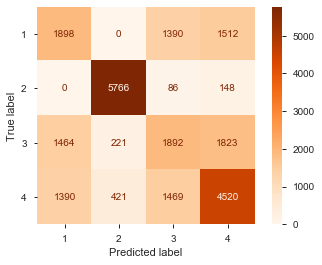

In [123]:

# Assess the performance of the model on test data
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n" ,confusion_matrix(y_test, y_pred))
disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=[1,2,3,4],
                                 cmap=plt.cm.Oranges,
                                 normalize=None,
                                values_format='d')
plt.grid(False)  


### <span style='color:blue'> Observation: Accuracy on test data has improved to 63.95% after tuning Decision Tree hyperparameters 

### <span style='color:blue'>Decision tree model has predicted the test data with an accuracy of 63.95%

## Let's Visualize the decision tree

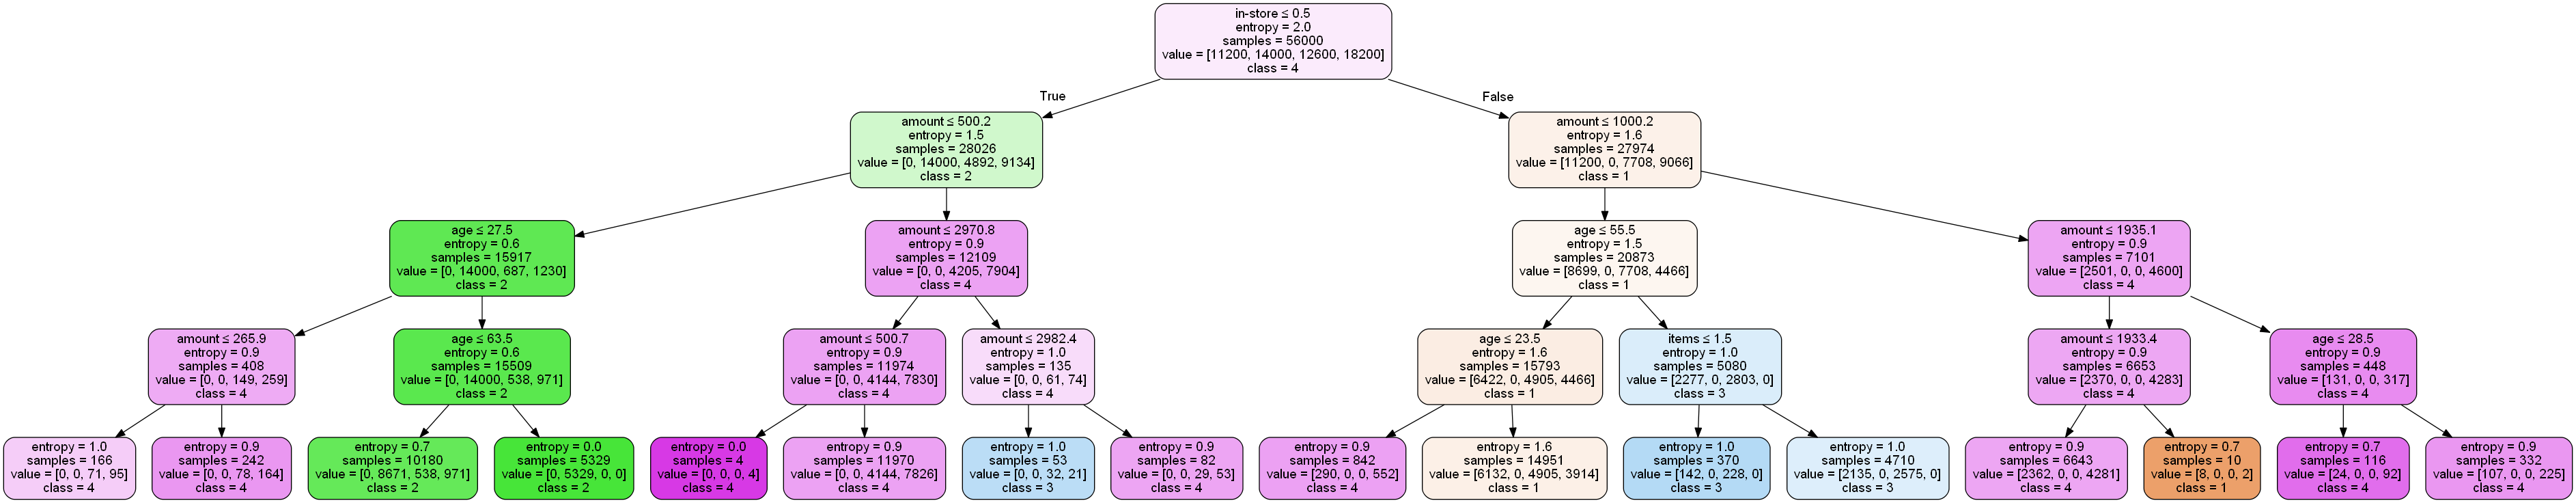

In [124]:
region_values = ['1','2','3','4'] #this is just a list specifying the region classes

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=region_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### BOOSTING

   
   Boosting is a popular machine learning algorithm that increases accuracy of your model

## GradientBoosting Classifier

In [125]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


model = GradientBoostingClassifier(n_estimators=100,max_depth=5)


# Cross Validation

result = cross_val_score(model, X,y, cv=5, scoring='accuracy')
print(result.mean())

# Fit the model
model.fit(X_train,y_train)

# Predict the train data
predict_train= model.predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# Predict the test data
predict_test= model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

0.642075

accuracy_score on train dataset :  0.6663214285714286

accuracy_score on test dataset :  0.6378333333333334


### <span style='color:blue'>Accuracy is 63.7 % on test data

## AdaBoostClassifier

In [126]:

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
    n_estimators=200
)

# Fit the training data on model
classifier.fit(X_train, y_train)

# Predict the test data
predictions = classifier.predict(X_test)


# Assess the performance
print("Confusion matrix:\n\n",confusion_matrix(y_test, predictions))

print("Accuracy score\n\n",accuracy_score(y_test, predictions))

Confusion matrix:

 [[2710    0 1466  624]
 [   0 5737   89  174]
 [1477  214 2559 1150]
 [2764  405 2288 2343]]
Accuracy score

 0.5562083333333333


### <span style='color:blue'>Accuracy is 56.8% on test data</span>

## Tuning the hyperparameters of Adaboost

In [127]:
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'n_estimators': (1, 2),
                  'base_estimator__max_depth': (1, 2),
                  'algorithm': ('SAMME', 'SAMME.R')}
                                
# Performing GridSearch                                
clf = GridSearchCV(boost, parameters)

clf.fit(X_train, y_train)


CV_Result = cross_val_score(clf, X,y, cv=3, n_jobs=-1)
CV_Result
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.62031725 0.62222972 0.61872797]

0.6204249787873676

0.0014316132868968134


### <span style='color:blue'>Accuracy is 62.09% after tuning the hyperparameters</span>